In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # for Dickey-Fuller Test
from additional import DickeyFuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
RELIANCE = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")

In [3]:
RELIANCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300183,104661939
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150980,83354233


In [4]:
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7079 non-null   object 
 1   Open       7079 non-null   float64
 2   High       7079 non-null   float64
 3   Low        7079 non-null   float64
 4   Close      7079 non-null   float64
 5   Adj Close  7079 non-null   float64
 6   Volume     7079 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 387.3+ KB


In [5]:
RELIANCE["Date"] = pd.to_datetime(RELIANCE["Date"])

In [6]:
RELIANCE = RELIANCE[RELIANCE["Date"] >= '2018-01-01'].reset_index(drop = True)

In [7]:
DickeyFuller.StationarityCheck(RELIANCE)

Results of Dickey Fuller Test
Test Statistics: -0.4886074396213302
p-value: 0.8942205699715091
Number of lags used: 3
Number of observations used: 1521
critical value (1%): -3.434656620970318
critical value (5%): -2.863442104538126
critical value (10%): -2.5677826540508275


In [8]:
RELIANCE['log Adj Close'] = np.log(RELIANCE['Adj Close'])
RELIANCE_log_moving_avg = RELIANCE['log Adj Close'].rolling(12).mean()
RELIANCE_log_std = RELIANCE['log Adj Close'].rolling(12).std()

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

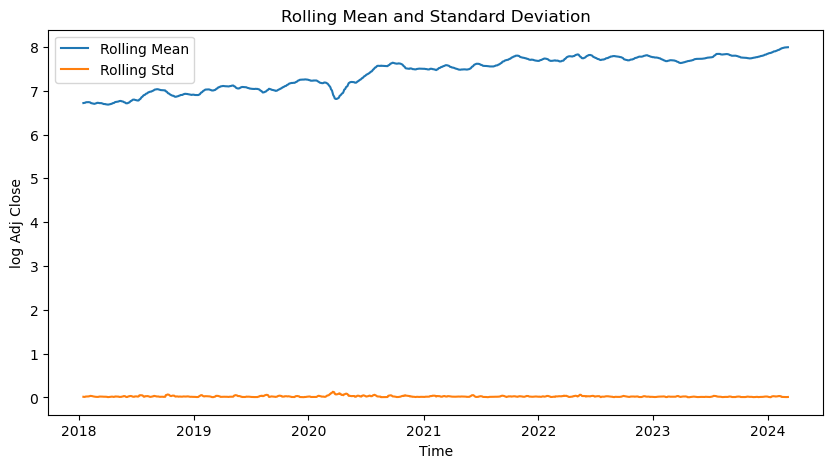

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(RELIANCE['Date'], RELIANCE_log_moving_avg, label="Rolling Mean")
plt.plot(RELIANCE['Date'], RELIANCE_log_std, label="Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")

In [10]:
RELIANCE_Train_Data = RELIANCE[RELIANCE['Date'] < '2023-01-12']
RELIANCE_Test_Data = RELIANCE[RELIANCE['Date'] >= '2023-01-12'].reset_index(drop=True)

print("Size of Training Data :{}".format(RELIANCE_Train_Data.shape))
print("Size of Testing Data :{}".format(RELIANCE_Test_Data.shape))

Size of Training Data :(1244, 8)
Size of Testing Data :(281, 8)


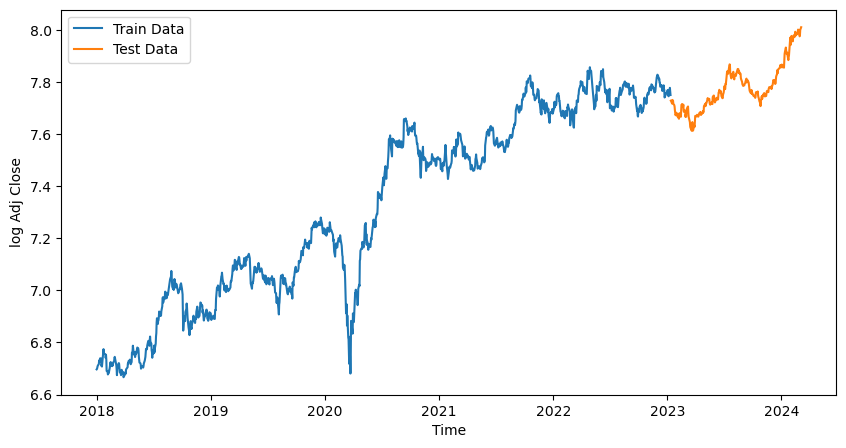

In [11]:

plt.figure(figsize=(10, 5))
plt.plot(RELIANCE_Train_Data['Date'], RELIANCE_Train_Data['log Adj Close'], label='Train Data')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_Test_Data['log Adj Close'], label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

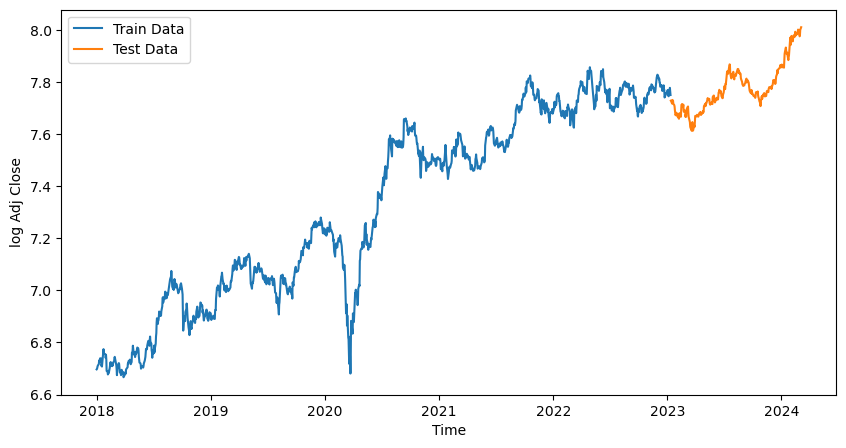

In [12]:

plt.figure(figsize=(10, 5))
plt.plot(RELIANCE_Train_Data['Date'], RELIANCE_Train_Data['log Adj Close'], label='Train Data')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_Test_Data['log Adj Close'], label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

In [13]:
ARIMA_MODEL = ARIMA(RELIANCE_Train_Data['log Adj Close'], order=(5, 2, 2))
FITTED_ARIMA = ARIMA_MODEL.fit()
print(FITTED_ARIMA.summary())

c:\Users\thepr\.conda\envs\tf_exec_2.10\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:          log Adj Close   No. Observations:                 1244
Model:                 ARIMA(5, 2, 2)   Log Likelihood                3100.535
Date:                Mon, 25 Mar 2024   AIC                          -6185.070
Time:                        15:46:01   BIC                          -6144.074
Sample:                             0   HQIC                         -6169.653
                               - 1244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9107      0.185     -4.922      0.000      -1.273      -0.548
ar.L2          0.0069      0.032      0.216      0.829      -0.055       0.069
ar.L3          0.0278      0.032      0.881      0.3

c:\Users\thepr\.conda\envs\tf_exec_2.10\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
AUTO_ARIMA = auto_arima(RELIANCE_Train_Data['log Adj Close'], seasonal=False)
print(AUTO_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1244
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3106.272
Date:                Mon, 25 Mar 2024   AIC                          -6208.545
Time:                        15:46:02   BIC                          -6198.294
Sample:                             0   HQIC                         -6204.690
                               - 1244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.001      1.504      0.133      -0.000       0.002
sigma2         0.0004   7.01e-06     56.368      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.02   Jarque-

c:\Users\thepr\.conda\envs\tf_exec_2.10\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


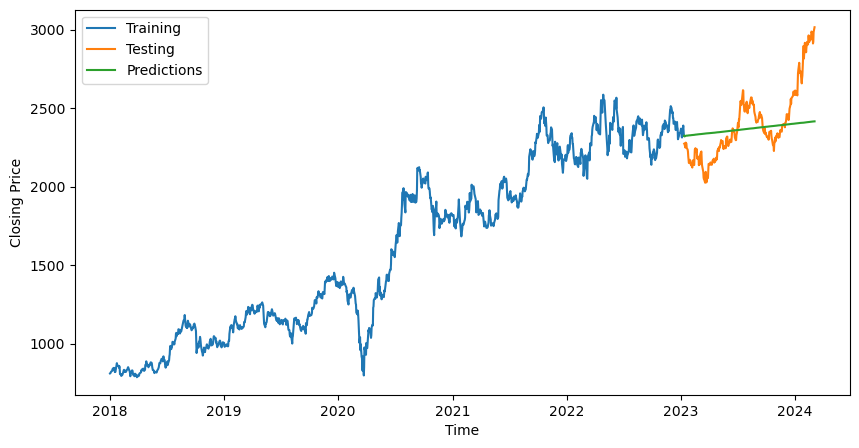

In [15]:
RELIANCE_PREDS = FITTED_ARIMA.forecast(281,alpha=0.05)
RELIANCE_PREDICTION = np.exp(RELIANCE_PREDS)
plt.figure(figsize=(10, 5))
plt.plot(RELIANCE_Train_Data['Date'], RELIANCE_Train_Data['Adj Close'], label='Training')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_Test_Data['Adj Close'], label='Testing')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_PREDICTION, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [16]:
RELIANCE_PREDICTION_REINDEXED = RELIANCE_PREDICTION.reset_index(drop=True)

In [17]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Data['Adj Close'], RELIANCE_PREDICTION))
mape = np.mean(
    np.abs(RELIANCE_PREDICTION_REINDEXED - RELIANCE_Test_Data['Adj Close']) / np.abs(RELIANCE_Test_Data['Adj Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 209.05739565371962
MAPE: 0.06310102796426213


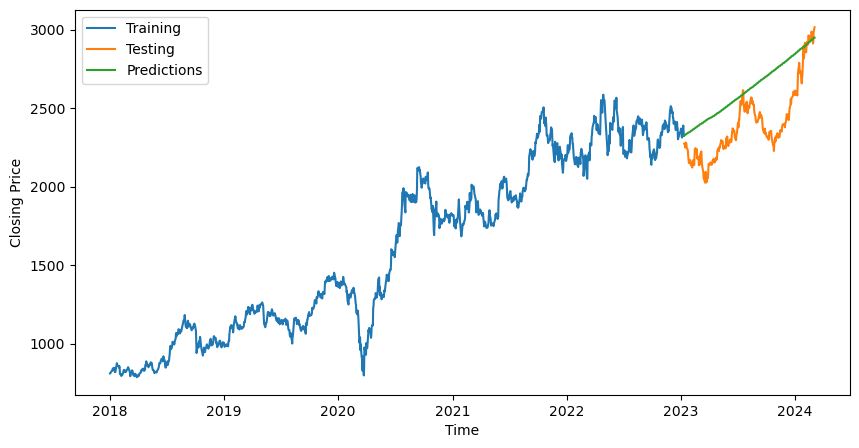

In [20]:
RELIANCE_PREDS_2 = AUTO_ARIMA.predict(281)
RELIANCE_PREDICTION_2 = np.exp(RELIANCE_PREDS_2)
plt.figure(figsize=(10, 5))
plt.plot(RELIANCE_Train_Data['Date'], RELIANCE_Train_Data['Adj Close'], label='Training')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_Test_Data['Adj Close'], label='Testing')
plt.plot(RELIANCE_Test_Data['Date'], RELIANCE_PREDICTION_2, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [21]:
RELIANCE_PREDICTION_REINDEXED_2 = RELIANCE_PREDICTION_2.reset_index(drop=True)

In [22]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Data['Adj Close'], RELIANCE_PREDICTION_2))
mape = np.mean(
    np.abs(RELIANCE_PREDICTION_REINDEXED_2 - RELIANCE_Test_Data['Adj Close']) / np.abs(RELIANCE_Test_Data['Adj Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 257.953875202639
MAPE: 0.09764938949531687
